<a href="https://colab.research.google.com/github/ElliotRoosevelt/visualization/blob/main/assignment/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

In [1]:
! git clone https://github.com/DS3001/visualization

Cloning into 'visualization'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 34 (delta 4), reused 1 (delta 1), pack-reused 23
Receiving objects: 100% (34/34), 7.18 MiB | 17.01 MiB/s, done.
Resolving deltas: 100% (7/7), done.


**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
air=pd.read_csv('/content/visualization/assignment/data/airbnb_hw.csv')
price = air['Price']
price = price.str.replace(',','')
price = pd.to_numeric(price,errors='coerce')
air['Price'] = price
del price

In [4]:
#2 What are are the dimensions of the data? 30478, 13
#How many observations are there? 30478 observations
air.shape


(30478, 13)

In [5]:
#2
#What are the variables included? Use .head() to examine the first few rows of data. 13 variables
air.columns
air.head(15)

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0
5,1039,7/25/2008,Big Greenpoint 1BD w/ Skyline View,Brooklyn,Apartment,100.0,Entire home/apt,11222.0,1.0,1,4,149,100.0
6,1783,8/12/2008,Amazing Also,Manhattan,Apartment,100.0,Entire home/apt,10004.0,1.0,1,9,250,100.0
7,2078,8/15/2008,"Colorful, quiet, & near the subway!",Brooklyn,Apartment,90.0,Private room,11201.0,1.0,1,80,90,94.0
8,2339,8/20/2008,East Village Cocoon: 2 Bedroom Flat,Manhattan,Apartment,90.0,Entire home/apt,10009.0,2.0,1,95,270,90.0
9,2339,8/20/2008,Lovely 2 Bedroom East Village Nest,Manhattan,Apartment,95.0,Entire home/apt,10009.0,2.0,1,23,290,96.0


In [6]:
#2
#What are the variables included? Use .head() to examine the first few rows of data. 13 variables
air.columns

Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')

In [7]:
#3
#Cross tabulate Room Type and Property Type. What patterns do you see in what kinds of rentals are available?
#I see that there are many apartments, houses, lofts that allow rentals of the enitre building and private rooms.
#This dataset has interesting choices of propterty types.
pd.crosstab(air['Property Type'],air['Room Type'])

Room Type,Entire home/apt,Private room,Shared room
Property Type,,,
Apartment,15669,10748,685
Bed & Breakfast,13,155,12
Boat,7,1,0
Bungalow,4,0,0
Cabin,1,1,0
Camper/RV,6,1,0
Castle,0,1,0
Chalet,0,1,0
Condominium,72,22,0


In [8]:
#3
#For which kinds of properties are private rooms more common than renting the entire property?
#Treehouses, tents, other, huts, houses, dorms, chalets, castles, bed & breakfasts have private rooms more common than renting the entire proprety.

In [9]:
import seaborn as sns

<Axes: xlabel='Price', ylabel='Count'>

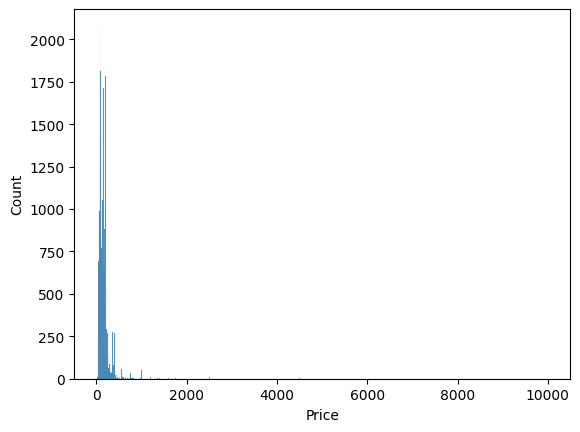

In [10]:
#4
#For Price, make a histogram, kernel density, box plot, and a statistical description of the variable.
sns.histplot(data=air,x='Price')

<Axes: xlabel='Price', ylabel='Density'>

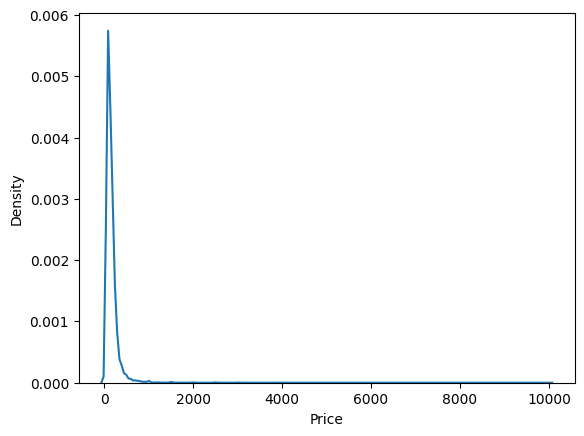

In [11]:
sns.kdeplot(data=air,x='Price')

<Axes: xlabel='Price'>

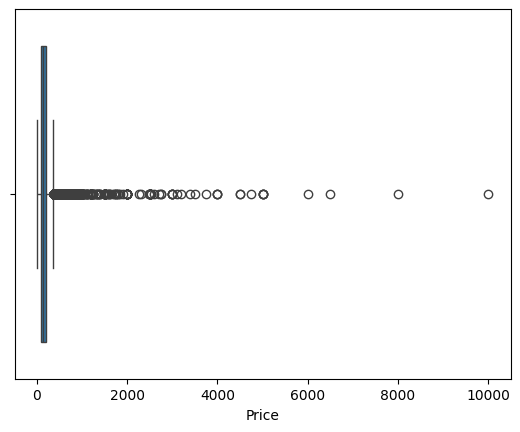

In [12]:
sns.boxplot(data=air,x='Price')

In [13]:
air['Price'].describe()

count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64

In [14]:
#Are the data badly scaled? Are there many outliers?
  #The data are badly skewed due to the outliers, therefore, do not have good representation of data.
  #Based on the visualization, there are outliers that spread out to 10000 and a couple of outliers make up that spread.

In [15]:
#Use log to transform price into a new variable, price_log, and take these steps again
air['price_log'] = np.log(air['Price'])

<Axes: xlabel='price_log', ylabel='Count'>

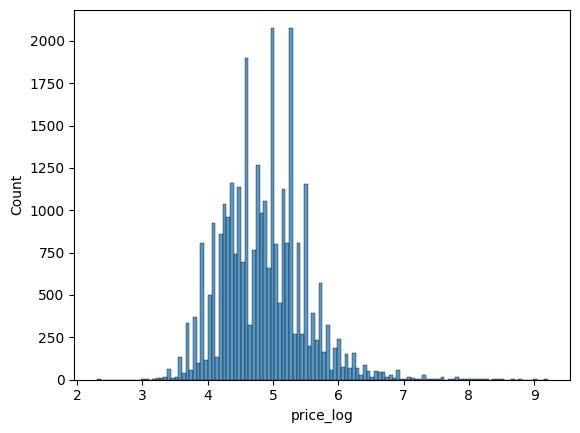

In [16]:
sns.histplot(data=air,x='price_log')


<Axes: xlabel='price_log', ylabel='Density'>

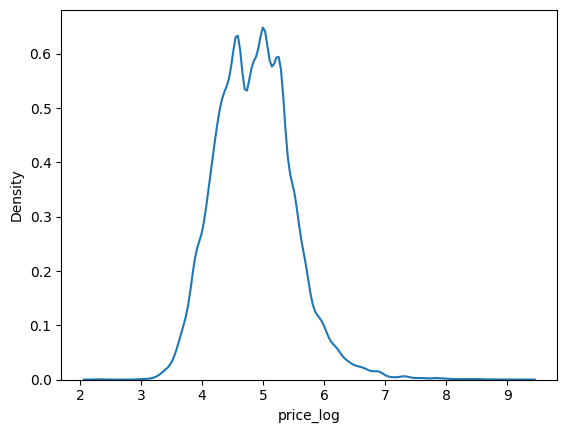

In [17]:
sns.kdeplot(data=air,x='price_log')

<Axes: xlabel='price_log'>

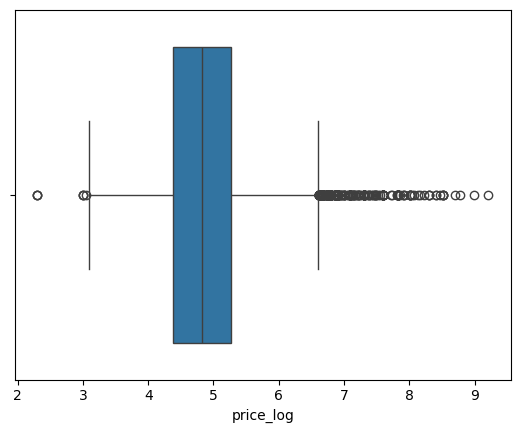

In [18]:
sns.boxplot(data=air,x='price_log')

In [19]:
air['price_log'].describe()

count    30478.000000
mean         4.860495
std          0.627704
min          2.302585
25%          4.382027
50%          4.828314
75%          5.273000
max          9.210340
Name: price_log, dtype: float64

<Axes: xlabel='Beds', ylabel='price_log'>

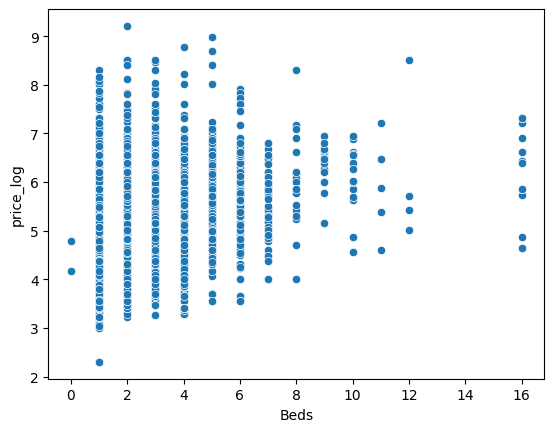

In [20]:
#5
#Make a scatterplot of price_log and Beds. Describe what you see.
sns.scatterplot( data=air, x='Beds', y='price_log')

In [21]:
#Use .groupby() to compute a desciption of Price conditional on/grouped by the nu#mber of beds.
air.loc[:,['Beds','Price']].groupby('Beds').describe()

Price                                                           \
        count         mean          std    min     25%    50%      75%   
Beds                                                                     
0.0       2.0    92.000000    38.183766   65.0   78.50   92.0   105.50   
1.0   20344.0   127.673810   107.047827   10.0   75.00  100.0   155.00   
2.0    6610.0   199.061271   225.706318   25.0  115.00  160.0   225.00   
3.0    2071.0   268.118300   303.106942   26.0  140.00  200.0   300.00   
4.0     783.0   315.332056   353.184402   27.0  150.00  247.0   375.00   
5.0     284.0   411.500000   672.610659   35.0  189.75  290.0   450.00   
6.0     177.0   401.768362   417.018431   35.0  199.00  275.0   425.00   
7.0      45.0   341.377778   220.116631   55.0  177.00  300.0   445.00   
8.0      24.0   589.041667   793.054934   55.0  243.75  350.0   481.25   
9.0      15.0   618.000000   233.649616  175.0  447.50  650.0   762.50   
10.0     16.0   480.187500   296.820534   95.0  291.00  407.5   706.25   
11.0      5.0   535.800000   499.217588  100.0  220.00  359.0   650.00   
12.0      4.0  1418.750000  2388.285211  150.0  206.25  262.5  1475.00   
16.0     13.0   736.000000   496.804287  104.0  350.00  625.0  1000.00   

               
          max  
Beds           
0.0     119.0  
1.0    4000.0  
2.0   10000.0  
3.0    5000.0  
4.0    6500.0  
5.0    8000.0  
6.0    2750.0  
7.0     900.0  
8.0    4000.0  
9.0    1050.0  
10.0   1050.0  
11.0   1350.0  
12.0   5000.0  
16.0   1500.0

In [22]:
#Describe any patterns you see in the average price and standard deviation in prices.
  #There seems to have a relative increase of mean price according to increase of beds. However, there is some variance.
  #The standard deviation seem to have a lot more variance, although it seems like as beds increase std dev also increase.

<Axes: xlabel='Beds', ylabel='price_log'>

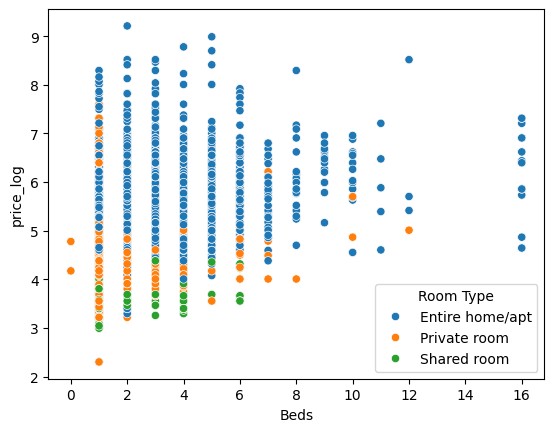

In [23]:
#6
#Make a scatterplot of price_log and Beds, but color the graph by Room Type and Property Type.
sns.scatterplot(data=air,x='Beds',y='price_log',hue='Room Type')

In [24]:
#What patterns do you see? Compute a description of Price conditional on Room Type and Property Type.
#Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation?
  #Room type's entire home/apt has a higher price avg and std dev. Property type's other has the highest mean prices and std dev.

#Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  #I think median is more reliable estimate of central tendency, because there are a lot of outliers.

In [25]:
var = 'Price'
group = 'Room Type'
air.loc[:,[group,var]].groupby(group).describe()

Price                                                     \
                   count        mean         std   min    25%    50%    75%   
Room Type                                                                     
Entire home/apt  17024.0  220.796346  242.222346  10.0  135.0  175.0  240.0   
Private room     12609.0   91.919740   67.119678  10.0   65.0   80.0  100.0   
Shared room        845.0   80.514793  110.756196  10.0   45.0   60.0   85.0   

                          
                     max  
Room Type                 
Entire home/apt  10000.0  
Private room      3000.0  
Shared room       2500.0

In [26]:
var = 'Price'
group = 'Property Type'
air.loc[:,[group,var]].groupby(group).describe()

Price                                                \
                   count        mean         std    min     25%    50%   
Property Type                                                            
Apartment        27102.0  162.045642  181.376882   10.0   85.00  130.0   
Bed & Breakfast    180.0  106.572222   84.701977   30.0   65.00   87.5   
Boat                 8.0  153.625000   49.231051  100.0  120.00  137.5   
Bungalow             4.0  150.750000   46.464144   87.0  133.50  160.5   
Cabin                2.0  165.000000  120.208153   80.0  122.50  165.0   
Camper/RV            7.0  103.571429  102.343958   39.0   47.00   49.0   
Castle               1.0  150.000000         NaN  150.0  150.00  150.0   
Chalet               1.0   99.000000         NaN   99.0   99.00   99.0   
Condominium         94.0  256.585106  249.357946   46.0  131.25  175.0   
Dorm                31.0   76.354839   42.424481   30.0   52.50   65.0   
House             2090.0  156.722967  307.116948   10.0   60.00   85.0   
Hut                  2.0   75.000000   35.355339   50.0   62.50   75.0   
Lighthouse           1.0   39.000000         NaN   39.0   39.00   39.0   
Loft               753.0  221.960159  271.958145   30.0   80.00  140.0   
Other               47.0  394.659574  696.663423   39.0   82.50  135.0   
Tent                 4.0  126.250000   94.989034   40.0   58.75  107.5   
Townhouse          136.0  203.933824  264.178901   45.0   89.50  135.0   
Treehouse            4.0  149.500000  100.520313   95.0   95.00  101.5   
Villa                8.0  328.000000  479.888975   60.0  107.50  187.5   

                                  
                    75%      max  
Property Type                     
Apartment        195.00  10000.0  
Bed & Breakfast  125.00    900.0  
Boat             178.50    250.0  
Bungalow         177.75    195.0  
Cabin            207.50    250.0  
Camper/RV        109.00    325.0  
Castle           150.00    150.0  
Chalet            99.00     99.0  
Condominium      298.75   1990.0  
Dorm              80.00    200.0  
House            150.00   8000.0  
Hut               87.50    100.0  
Lighthouse        39.00     39.0  
Loft             240.00   3000.0  
Other            378.00   4000.0  
Tent             175.00    250.0  
Townhouse        206.25   2500.0  
Treehouse        156.00    300.0  
Villa            224.75   1500.0

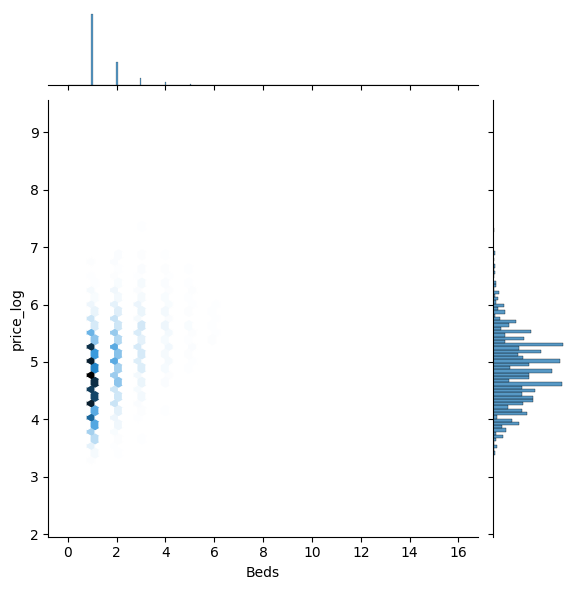

In [27]:
#7
#Use seaborn to make a jointplot with kind=hex.
#Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?
  #Because of outliers, the number of beds and price log is a little different. Properties usuallyl have 1-2 beds and the price log is 5-6.

sns.jointplot(data=air,x='Beds',y='price_log',kind='hex')

**Q3.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

2. The dictionary document footnoted how to sum of total benfeciaries may be not be accurate due to missigness, give caution to researchers about missing data due to non-response, and that the inapplicable values have been combined with missing values. Overall, the document is open about missing data and clearly states caution/ how they handled them.


In [29]:
winter2021=pd.read_csv('/content/puf2021_2_winter.csv')
winter2021.shape

<ipython-input-29-79c085fd0c9f>:1: DtypeWarning: Columns (19,26,27,29,30,31,32,33,34,35,36,37,38,53,68,70,71,72,76,78,79,80,93) have mixed types. Specify dtype option on import or set low_memory=False.
  winter2021=pd.read_csv('/content/puf2021_2_winter.csv')


(10628, 195)

In [30]:
winter2021.columns

Index(['PUF_ID', 'SURVEYYR', 'VERSION', 'ACW_D_ERVIST', 'ACW_D_OPVIST',
       'ACW_OPDMCOND', 'ACW_OPDTESTS', 'ACW_OPDFOLUP', 'ACW_OPDCHKUP',
       'ACW_OPDRFRL',
       ...
       'PUFW091', 'PUFW092', 'PUFW093', 'PUFW094', 'PUFW095', 'PUFW096',
       'PUFW097', 'PUFW098', 'PUFW099', 'PUFW100'],
      dtype='object', length=195)

In [31]:
winter2021.head()

,PUF_ID,SURVEYYR,VERSION,ACW_D_ERVIST,ACW_D_OPVIST,ACW_OPDMCOND,ACW_OPDTESTS,ACW_OPDFOLUP,ACW_OPDCHKUP,ACW_OPDRFRL,...,PUFW091,PUFW092,PUFW093,PUFW094,PUFW095,PUFW096,PUFW097,PUFW098,PUFW099,PUFW100
0,21000003,2021,1,2,2,NaN,NaN,NaN,NaN,NaN,...,1045.706696,5760.232917,1238.819589,1582.321331,6297.836256,1185.119100,6019.837842,1456.820343,5761.356732,1084.494727
1,21000004,2021,1,1,1,1,0,0,0,0,...,27658.990088,4276.572219,3336.791049,3427.987761,5065.467427,19814.707032,21231.859461,19958.644413,19677.181033,23455.013407
2,21000005,2021,1,2,1,1,0,0,0,0,...,4439.859983,4199.383768,639.290869,4683.155905,650.140088,652.730993,4067.281632,5223.444080,683.351525,708.141568
3,21000012,2021,1,2,1,0,0,0,1,0,...,15977.647306,18303.716548,12642.452962,3281.139890,2823.675377,2669.230705,2778.022523,20252.307471,16618.873292,15288.345882
4,21000016,2021,1,2,2,NaN,NaN,NaN,NaN,NaN,...,16803.442783,2547.409961,2376.187558,2594.532512,2489.749054,2412.770126,2454.206100,3197.307724,3404.041493,18193.732515


In [59]:
puf=winter2021['PUFWWGT']
print(puf.unique(),'\n')
print(puf.value_counts(),'\n')

[ 3757.537989  13608.601929   2388.8800362 ...  7286.2154261 16910.804184
  4634.5729072] 

3730.542459    5
5368.782530    4
4205.858496    4
3120.162038    4
4854.585031    4
              ..
8720.159686    1
2403.703037    1
5548.081753    1
7943.155621    1
4634.572907    1
Name: PUFWWGT, Length: 10320, dtype: int64 



In [78]:
tmw=winter2021['TMW_TELMEDUS']
print(tmw.unique(),'\n')
print(tmw.value_counts(),'\n')

[ 1.  2. nan] 

2.0    2907
1.0    2606
Name: TMW_TELMEDUS, dtype: int64 



In [76]:
tmw.apply(str)

0        1.0
1        2.0
2        2.0
3        1.0
4        nan
        ... 
10623    2.0
10624    2.0
10625    nan
10626    1.0
10627    2.0
Name: TMW_TELMEDUS, Length: 10628, dtype: object

In [79]:
winter2021['TMW_TELMEDUS'] = tmw
del tmw

In [81]:
#3.
#I chose these variables because I wanted to see the correlation between people who had appt and their weights
win=winter2021.iloc[:,92:95]

In [70]:
win

,TMW_TELMEDUS,TMW_TELMEDT4,PUFWWGT
0,1.0,1,3757.537989
1,2.0,NaN,13608.601929
2,2.0,NaN,2388.880036
3,1.0,1,10523.183704
4,NaN,NaN,9570.820266
...,...,...,...
10623,2.0,NaN,5207.620631
10624,2.0,NaN,5218.636516
10625,NaN,NaN,7286.215426
10626,1.0,1.0,16910.804184


<Axes: xlabel='PUFWWGT'>

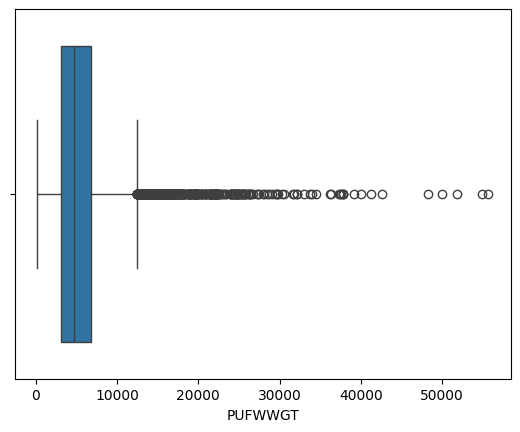

In [83]:
#4 There are outliers for values above 4500
sns.boxplot(data=win,x='PUFWWGT')

In [88]:
win['logwwgt'] = np.log(win['PUFWWGT'])

<Axes: xlabel='logwwgt'>

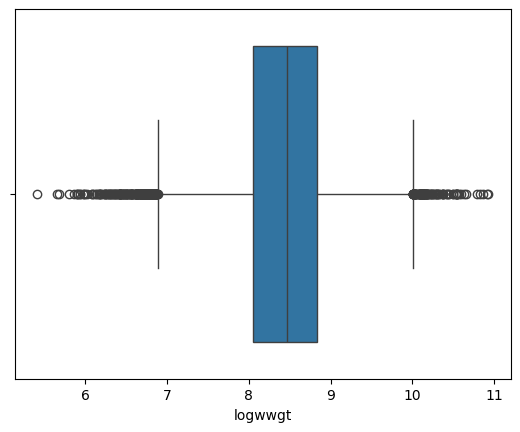

In [89]:
sns.boxplot(data=win,x='logwwgt')

<Axes: xlabel='TMW_TELMEDUS', ylabel='Count'>

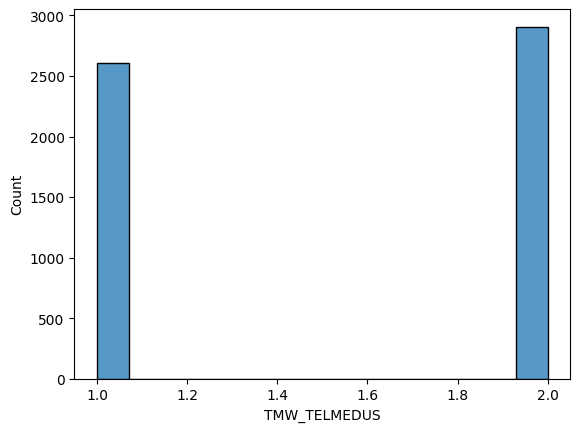

In [84]:
#no outliers
sns.histplot(data=win,x='TMW_TELMEDUS')

<Axes: xlabel='TMW_TELMEDUS', ylabel='Density'>

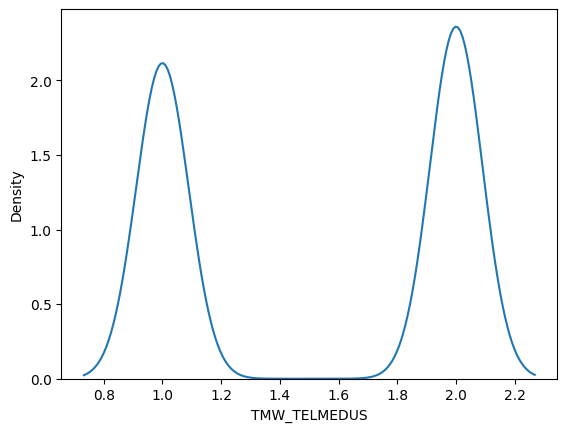

In [86]:
#no rescale needed
sns.kdeplot(data=win,x='TMW_TELMEDUS')

<Axes: xlabel='TMW_TELMEDUS', ylabel='PUFWWGT'>

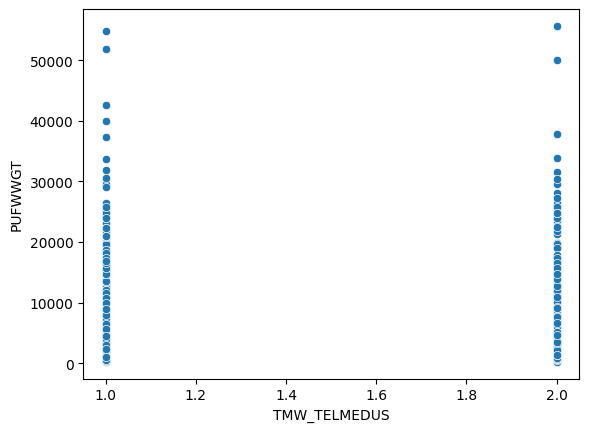

In [96]:
#People who do have medical appointments have lower PUF weight
sns.scatterplot( data=win, x='TMW_TELMEDUS', y='PUFWWGT')

<Axes: xlabel='TMW_TELMEDUS', ylabel='logwwgt'>

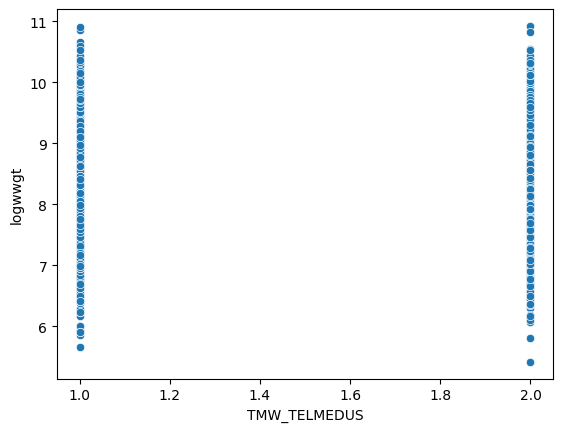

In [94]:
sns.scatterplot( data=win, x='TMW_TELMEDUS', y='logwwgt')

In [93]:
#Because the mean is much lower than the max, I think most values of PUFFWGGT are around 5000.
#And because the max is much larger than the mean, I assume that there are outliers that make using mean as analysis is not best.
win['PUFWWGT'].describe()

count    10628.000000
mean      5624.607990
std       4033.232153
min        225.127209
25%       3151.585514
50%       4755.819843
75%       6864.677185
max      55674.556218
Name: PUFWWGT, dtype: float64